<a href="https://colab.research.google.com/github/lcbjuk/ML/blob/master/Aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Revisao Aula 2**

In [0]:
from google.colab import drive
#drive.mount('/content/drive')

In [38]:
import pandas as pd
cotacoes = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/usd_ibov_20%20-%2020.csv')
cotacoes.head()

,Date,usd,bov
0,1/2/2020,4.0249,118.57310
1,1/3/2020,4.0668,117.70666
2,1/6/2020,4.0619,116.87792
3,1/7/2020,4.0677,116.66194
4,1/8/2020,4.0644,116.24703


In [39]:
from sklearn.linear_model import LinearRegression
rl = LinearRegression()
rl.fit( cotacoes[['bov']] , cotacoes['usd'])
print(rl.coef_ , rl.intercept_)

[-0.01783154] 6.303900300544503


In [40]:
cot_fut = pd.DataFrame({'bov':[120,110,100,90,80,70,60,68]})
rl.predict(cot_fut)

array([4.16411499, 4.34243043, 4.52074588, 4.69906132, 4.87737676,
       5.0556922 , 5.23400765, 5.09135529])

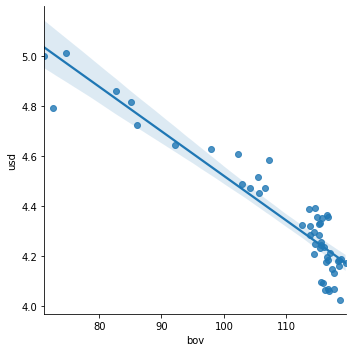

In [41]:
import seaborn as sns
sns.lmplot('bov' , 'usd' , data=cotacoes)

**kNN**

In [42]:
from sklearn.neighbors import KNeighborsClassifier

treino = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/homem_mulher%20-%20ok.csv')
treino

,SEXO,ALTURA,PESO
0,1,178,72
1,1,179,81
2,2,163,55
3,2,168,58
4,1,181,98
5,2,170,60
6,1,184,78
7,2,171,59


In [43]:
kviz = KNeighborsClassifier(n_neighbors=3)
kviz.fit(treino[['ALTURA','PESO']] , treino['SEXO'])

novos_dados = pd.DataFrame({
    'ALTURA':[175,165],
    'PESO':[75,65]
})

kviz.predict(novos_dados)

array([1, 2])

**Exercicio kNN**

In [44]:
from sklearn.neighbors import KNeighborsClassifier

treino = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20okk.csv')
treino

,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.4
1,0,2,7,9,2.6
2,0,1,7,9,5.8
3,0,1,7,9,4.7
4,0,1,7,9,3.9
...,...,...,...,...,...
95,1,1,4,1,2.9
96,1,1,4,1,1.4
97,0,2,7,8,2.6
98,0,1,7,8,5.8


In [45]:
teste = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20prever2.csv')
teste 

,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.40
1,0,2,7,9,2.60
2,0,1,7,9,5.80
3,0,1,7,9,4.70
4,0,1,7,9,3.90
5,0,1,8,9,3.25
6,0,1,8,8,7.20
7,1,2,4,3,1.25


In [46]:
kviz = KNeighborsClassifier(n_neighbors=5)
kviz.fit(treino[['Genero',	'GrauEscolaridade',	'Profissao'	,'Renda']] , treino['Inadimplente'])

previsoes = kviz.predict(teste[['Genero',	'GrauEscolaridade',	'Profissao'	,'Renda']])
previsoes

array([1, 0, 0, 0, 0, 0, 0, 1])

In [47]:
matriz = pd.crosstab(teste['Inadimplente'] , previsoes)
matriz

col_0,0,1
Inadimplente,,
0,6,0
1,0,2


**Naive Bayes**

In [48]:
from sklearn.naive_bayes import MultinomialNB

treino = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/JogarVolei%20-%20OKK%20-%20K.csv')
treino

,previsao,temperatura,umidade,vento,jogar
0,1,1,1,0,0
1,1,1,1,1,0
2,0,1,1,0,1
3,2,0,1,0,1
4,2,2,0,0,1
5,2,2,0,1,0
6,0,2,0,1,1
7,1,0,1,0,0
8,1,2,0,0,1
9,2,0,0,0,1


In [49]:
nb = MultinomialNB()
nb.fit(treino[['previsao','temperatura','umidade','vento']] , treino['jogar'])

nublado_tempA_umidA_semvento = pd.DataFrame({
    'previsao':[0],
    'temperatura':[1],
    'umidade':[1],
    'vento':[0]
})

nb.predict(nublado_tempA_umidA_semvento)

array([1])

**Exercicio Bayes**

In [50]:
treino = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20okk.csv')
treino.head() 

,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.4
1,0,2,7,9,2.6
2,0,1,7,9,5.8
3,0,1,7,9,4.7
4,0,1,7,9,3.9


In [51]:
nb= MultinomialNB()
nb.fit( treino[['Genero',	'GrauEscolaridade',	'Profissao',	'Renda']] , treino['Inadimplente'] )

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [52]:
teste = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20prever2.csv')
teste

,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.40
1,0,2,7,9,2.60
2,0,1,7,9,5.80
3,0,1,7,9,4.70
4,0,1,7,9,3.90
5,0,1,8,9,3.25
6,0,1,8,8,7.20
7,1,2,4,3,1.25


In [53]:
previsoes = nb.predict(teste[['Genero',	'GrauEscolaridade',	'Profissao',	'Renda']])
previsoes

array([1, 0, 0, 0, 0, 0, 0, 1])

In [54]:
matriz = pd.crosstab(teste['Inadimplente'] , previsoes)
matriz

col_0,0,1
Inadimplente,,
0,6,0
1,0,2


In [55]:
acuracia = sum(teste['Inadimplente'] == previsoes) / len(teste)
acuracia

1.0